In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Introduction

1. Title: Hepatitis Domain

2. Sources:
     (a) unknown
     (b) Donor: G.Gong  (Carnegie-Mellon University) via 
                   Bojan Cestnik
                   Jozef Stefan Institute
                   Jamova 39
                   61000 Ljubljana
                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }


5. Number of Instances: 155

6. Number of Attributes: 20 (including the class attribute)

7. Attribute information: 
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

    The BILIRUBIN attribute appears to be continuously-valued.  I checked
    this with the donater, Bojan Cestnik, who replied:

      About the hepatitis database and BILIRUBIN problem I would like to say
      the following: BILIRUBIN is continuous attribute (= the number of it's
      "values" in the ASDOHEPA.DAT file is negative!!!); "values" are quoted
      because when speaking about the continuous attribute there is no such 
      thing as all possible values. However, they represent so called
      "boundary" values; according to these "boundary" values the attribute
      can be discretized. At the same time, because of the continious
      attribute, one can perform some other test since the continuous
      information is preserved. I hope that these lines have at least roughly 
      answered your question. 

8. Missing Attribute Values: 
     Attribute Number:    Number of Missing Values:
                    1:    0
                    2:    0
                    3:    0
                    4:    1
                    5:    0
                    6:    1
                    7:    1
                    8:    1
                    9:    10
		   10:    11
		   11:    5
		   12:    5
		   13:    5
		   14:    5
		   15:    6
		   16:    29
		   17:    4
		   18:    16
		   19:    67
		   20:    0

9. Class Distribution:
     DIE: 32
    LIVE: 123



# Import Data

In [2]:
df = pd.read_csv("hepatitis.txt", header = None)
print(df)

     0    1   2  3   4  5  6  7  8  9  10 11 12 13    14   15   16   17  18  \
0     2   30   2  1   2  2  2  2  1  2  2  2  2  2  1.00   85   18  4.0   ?   
1     2   50   1  1   2  1  2  2  1  2  2  2  2  2  0.90  135   42  3.5   ?   
2     2   78   1  2   2  1  2  2  2  2  2  2  2  2  0.70   96   32  4.0   ?   
3     2   31   1  ?   1  2  2  2  2  2  2  2  2  2  0.70   46   52  4.0  80   
4     2   34   1  2   2  2  2  2  2  2  2  2  2  2  1.00    ?  200  4.0   ?   
..   ..  ...  .. ..  .. .. .. .. .. .. .. .. .. ..   ...  ...  ...  ...  ..   
150   1   46   1  2   2  1  1  1  2  2  2  1  1  1  7.60    ?  242  3.3  50   
151   2   44   1  2   2  1  2  2  2  1  2  2  2  2  0.90  126  142  4.3   ?   
152   2   61   1  1   2  1  1  2  1  1  2  1  2  2  0.80   75   20  4.1   ?   
153   2  NaN   2  1   2  1  2  2  2  2  1  1  2  1  1.50   81   19  4.1  48   
154   1   43   1  2   2  1  2  2  2  2  1  1  1  2  1.20  100   19  3.1  42   

      19  
0    1.0  
1    1.0  
2    1.0  
3    1.

# Given Column Names

### Labels are from hepatitis.names file present in the link provided above

In [3]:
df_columns = ['CLASS','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',
       'LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN',
      'PROTIME','HISTOLOGY'] 

In [4]:
df = pd.read_csv('hepatitis.txt', sep=',', header=None, names=df_columns)
print(df.head())

   CLASS AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER_BIG  \
0      2  30    2       1           2       2       2        2         1   
1      2  50    1       1           2       1       2        2         1   
2      2  78    1       2           2       1       2        2         2   
3      2  31    1       ?           1       2       2        2         2   
4      2  34    1       2           2       2       2        2         2   

  LIVER_FIRM SPLEEN_PALPABLE SPIDERS ASCITES VARICES BILIRUBIN ALK_PHOSPHATE  \
0          2               2       2       2       2      1.00            85   
1          2               2       2       2       2      0.90           135   
2          2               2       2       2       2      0.70            96   
3          2               2       2       2       2      0.70            46   
4          2               2       2       2       2      1.00             ?   

  SGOT ALBUMIN PROTIME  HISTOLOGY  
0   18     4.0       ?    

In [5]:
## Numerical and categorical values
numerical_var = ['AGE','BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
categorical_var = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES','HISTOLOGY','CLASS']

# Data Processing

### Cleaning the data- Handling missing values

In [6]:
#replace nan and ?
df.replace("?",np.nan, inplace = True)
df.isnull().sum()

CLASS               0
AGE                 1
SEX                 0
STEROID             3
ANTIVIRALS          0
FATIGUE             2
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     6
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           8
ALK_PHOSPHATE      31
SGOT                4
ALBUMIN            17
PROTIME            67
HISTOLOGY           1
dtype: int64

#### As we can see above, there are missing values identified with 'NaN' .

In [7]:
#shape of data
df.shape

(155, 20)

The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data.

The dataset consists of 155 rows observations and 20 variables

# Exploratory Data Analysis
    
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. The method is univariate, bivariate or multivariate.

In exploratory data analysis, I will cover the following major topics 

- Handle Missing value  
- Changing Misleading Variables   
- Make sure data is tidy
- Correlation of each variables
- Heatmap to show the correlation
    
 For graphical representation
- univariate
- bivariate
- multivariate
    



# Tidy Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            155 non-null    int64  
 1   AGE              153 non-null    float64
 2   SEX              155 non-null    int64  
 3   STEROID          151 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          153 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER_BIG        144 non-null    float64
 9   LIVER_FIRM       144 non-null    float64
 10  SPLEEN_PALPABLE  149 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          148 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        147 non-null    float64
 15  ALK_PHOSPHATE    120 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [47]:
df.dtypes

CLASS                int64
AGE                float64
SEX                  int64
STEROID            float64
ANTIVIRALS           int64
FATIGUE            float64
MALAISE            float64
ANOREXIA           float64
LIVER_BIG          float64
LIVER_FIRM         float64
SPLEEN_PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK_PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY          float64
dtype: object

In [48]:
display(df.dtypes.value_counts())

float64    17
int64       3
dtype: int64

### We can see above, 16 out of 20 variable appear to be object data type, 1 float and 3 integer data type. Some of these variable are categoricals and some of them are numericals. It is required to change all data types into float for analysis.   

In [11]:
df['AGE'] = pd.to_numeric(df['AGE'],errors='coerce')
df['STEROID'] = pd.to_numeric(df['STEROID'],errors='coerce')
df['FATIGUE'] = pd.to_numeric(df['FATIGUE'],errors='coerce')
df['MALAISE'] = pd.to_numeric(df['MALAISE'],errors='coerce')
df['ANOREXIA'] = pd.to_numeric(df['ANOREXIA'],errors='coerce')
df['LIVER_BIG'] = pd.to_numeric(df['LIVER_BIG'],errors='coerce')
df['LIVER_FIRM'] = pd.to_numeric(df['LIVER_FIRM'],errors='coerce')
df['SPLEEN_PALPABLE'] = pd.to_numeric(df['SPLEEN_PALPABLE'],errors='coerce')
df['SPIDERS'] = pd.to_numeric(df['SPIDERS'],errors='coerce')
df['ASCITES'] = pd.to_numeric(df['ASCITES'],errors='coerce')
df['VARICES'] = pd.to_numeric(df['VARICES'],errors='coerce')
df['BILIRUBIN'] = pd.to_numeric(df['BILIRUBIN'],errors='coerce')
df['ALK_PHOSPHATE'] = pd.to_numeric(df['ALK_PHOSPHATE'],errors='coerce')
df['SGOT'] = pd.to_numeric(df['SGOT'],errors='coerce')
df['ALBUMIN'] = pd.to_numeric(df['ALBUMIN'],errors='coerce')
df['PROTIME'] = pd.to_numeric(df['PROTIME'],errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            155 non-null    int64  
 1   AGE              153 non-null    float64
 2   SEX              155 non-null    int64  
 3   STEROID          151 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          153 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER_BIG        144 non-null    float64
 9   LIVER_FIRM       144 non-null    float64
 10  SPLEEN_PALPABLE  149 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          148 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        147 non-null    float64
 15  ALK_PHOSPHATE    120 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [13]:
display(df.dtypes.value_counts())

float64    17
int64       3
dtype: int64

# Check for missing or null values of each columns

In [14]:
df1 = df.isna().sum()
df1

CLASS               0
AGE                 2
SEX                 0
STEROID             4
ANTIVIRALS          0
FATIGUE             2
MALAISE             1
ANOREXIA            1
LIVER_BIG          11
LIVER_FIRM         11
SPLEEN_PALPABLE     6
SPIDERS             5
ASCITES             7
VARICES             5
BILIRUBIN           8
ALK_PHOSPHATE      35
SGOT                4
ALBUMIN            19
PROTIME            68
HISTOLOGY           1
dtype: int64

# Data Summary

In [15]:
df.describe()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,153.000000,155.000000,151.000000,155.000000,153.000000,154.000000,154.000000,144.000000,144.000000,149.000000,150.000000,148.000000,150.00000,147.000000,120.000000,151.00000,136.000000,87.000000,154.000000
mean,1.793548,41.124183,1.103226,1.509934,1.845161,1.352941,66.519481,1.792208,1.833333,1.583333,1.798658,68.313333,1.864865,1.88000,1.436735,1019.591667,85.89404,3.816176,61.919540,1.454545
std,0.406070,12.611774,0.305240,0.501565,0.362923,0.479454,805.613494,0.407051,0.373979,0.494727,0.402356,816.279168,0.343029,0.32605,1.217795,9156.258375,89.65089,0.657968,22.999099,0.499554
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.300000,30.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.00000,0.750000,75.000000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,62.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.500000,133.500000,100.50000,4.200000,76.500000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,9999.000000,2.000000,2.000000,2.000000,2.000000,9999.000000,2.000000,2.00000,8.000000,99999.000000,648.00000,6.400000,100.000000,2.000000


## From the description of the dataset we can see that data has some misleading values like 9999,99999. Now I will change those misleading values with nan using replace method

In [16]:
df1 = df.replace([9999,99999],np.nan)
df1

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30.0,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1.0
1,2,50.0,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1.0
2,2,78.0,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1.0
3,2,31.0,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1.0
4,2,34.0,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46.0,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2.0
151,2,44.0,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2.0
152,2,61.0,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2.0
153,2,NaN,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2.0


In [17]:
df1 = df1.astype(float)

In [18]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLASS,155.0,1.793548,0.406070,1.0,2.00,2.0,2.00,2.0
AGE,153.0,41.124183,12.611774,7.0,32.00,39.0,50.00,78.0
SEX,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
STEROID,151.0,1.509934,0.501565,1.0,1.00,2.0,2.00,2.0
ANTIVIRALS,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
FATIGUE,153.0,1.352941,0.479454,1.0,1.00,1.0,2.00,2.0
MALAISE,153.0,1.601307,0.491237,1.0,1.00,2.0,2.00,2.0
ANOREXIA,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
LIVER_BIG,144.0,1.833333,0.373979,1.0,2.00,2.0,2.00,2.0
LIVER_FIRM,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0


In [19]:
df1.isnull().sum().sum()

194

# Finding out nan in dataframe

In [20]:
print('Count of NAN ' + str(df1.isnull().sum().sum()))
print(df1)

Count of NAN 194
     CLASS   AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0      2.0  30.0  2.0      1.0         2.0      2.0      2.0       2.0   
1      2.0  50.0  1.0      1.0         2.0      1.0      2.0       2.0   
2      2.0  78.0  1.0      2.0         2.0      1.0      2.0       2.0   
3      2.0  31.0  1.0      NaN         1.0      2.0      2.0       2.0   
4      2.0  34.0  1.0      2.0         2.0      2.0      2.0       2.0   
..     ...   ...  ...      ...         ...      ...      ...       ...   
150    1.0  46.0  1.0      2.0         2.0      1.0      1.0       1.0   
151    2.0  44.0  1.0      2.0         2.0      1.0      2.0       2.0   
152    2.0  61.0  1.0      1.0         2.0      1.0      1.0       2.0   
153    2.0   NaN  2.0      1.0         2.0      1.0      2.0       2.0   
154    1.0  43.0  1.0      2.0         2.0      1.0      2.0       2.0   

     LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES  VARICES  \
0          1.0      

# filling out nan with backfill method

In [21]:
df2 = df1.bfill()
print(df2)

     CLASS   AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0      2.0  30.0  2.0      1.0         2.0      2.0      2.0       2.0   
1      2.0  50.0  1.0      1.0         2.0      1.0      2.0       2.0   
2      2.0  78.0  1.0      2.0         2.0      1.0      2.0       2.0   
3      2.0  31.0  1.0      2.0         1.0      2.0      2.0       2.0   
4      2.0  34.0  1.0      2.0         2.0      2.0      2.0       2.0   
..     ...   ...  ...      ...         ...      ...      ...       ...   
150    1.0  46.0  1.0      2.0         2.0      1.0      1.0       1.0   
151    2.0  44.0  1.0      2.0         2.0      1.0      2.0       2.0   
152    2.0  61.0  1.0      1.0         2.0      1.0      1.0       2.0   
153    2.0  43.0  2.0      1.0         2.0      1.0      2.0       2.0   
154    1.0  43.0  1.0      2.0         2.0      1.0      2.0       2.0   

     LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES  VARICES  \
0          1.0         2.0           

### Again checking nan to make sure data looks tidy

In [22]:
print('Count of NAN ' + str(df2.isnull().sum().sum()))
print(df2)

Count of NAN 0
     CLASS   AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0      2.0  30.0  2.0      1.0         2.0      2.0      2.0       2.0   
1      2.0  50.0  1.0      1.0         2.0      1.0      2.0       2.0   
2      2.0  78.0  1.0      2.0         2.0      1.0      2.0       2.0   
3      2.0  31.0  1.0      2.0         1.0      2.0      2.0       2.0   
4      2.0  34.0  1.0      2.0         2.0      2.0      2.0       2.0   
..     ...   ...  ...      ...         ...      ...      ...       ...   
150    1.0  46.0  1.0      2.0         2.0      1.0      1.0       1.0   
151    2.0  44.0  1.0      2.0         2.0      1.0      2.0       2.0   
152    2.0  61.0  1.0      1.0         2.0      1.0      1.0       2.0   
153    2.0  43.0  2.0      1.0         2.0      1.0      2.0       2.0   
154    1.0  43.0  1.0      2.0         2.0      1.0      2.0       2.0   

     LIVER_BIG  LIVER_FIRM  SPLEEN_PALPABLE  SPIDERS  ASCITES  VARICES  \
0          1.0        

In [23]:
df2.isnull().sum().sum()

0

# Correlation Matrix

### Lets see can we reduce the dimensionality of the data, Finding out correlation matrix

In [24]:
df2.corr()


,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
CLASS,1.000000,-0.248060,0.173051,0.112148,-0.130196,0.311644,3.318692e-01,0.133638,-0.050327,0.057855,2.342606e-01,0.380274,0.469334,0.362385,-0.441954,-0.070257,-0.064819,0.384594,0.245786,-0.337856
AGE,-0.248060,1.000000,-0.011955,-0.056720,-0.008787,-0.288471,-1.213043e-01,0.092011,-0.118675,-0.141697,-8.012302e-02,-0.194952,-0.050830,-0.065307,0.194846,-0.041728,0.086522,-0.248368,-0.203166,0.179039
SEX,0.173051,-0.011955,1.000000,-0.053382,-0.089249,-0.074340,-2.597038e-02,0.015886,-0.081830,-0.060017,-4.847804e-02,-0.073305,0.130587,0.056792,-0.061099,0.099468,-0.013074,0.039044,0.092865,-0.137450
STEROID,0.112148,-0.056720,-0.053382,1.000000,0.049502,0.151448,2.108185e-01,0.080253,0.207207,0.053287,4.848826e-02,0.050275,-0.064598,-0.068893,-0.054498,-0.010280,-0.044320,0.232134,0.076184,-0.081172
ANTIVIRALS,-0.130196,-0.008787,-0.089249,0.049502,1.000000,-0.055310,-2.184260e-02,-0.042072,0.054746,0.075717,-1.645476e-01,-0.153038,-0.164747,-0.155148,0.175174,0.102537,0.101840,-0.119545,-0.001314,0.209242
FATIGUE,0.311644,-0.288471,-0.074340,0.151448,-0.055310,1.000000,5.780060e-01,0.378272,0.105254,0.293303,1.926687e-01,0.384153,0.285450,0.184642,-0.287583,-0.080642,-0.201543,0.286509,0.153472,-0.158201
MALAISE,0.331869,-0.121304,-0.025970,0.210819,-0.021843,0.578006,1.000000e+00,0.592159,0.035806,0.144437,-1.535809e-16,0.312386,0.314270,0.156200,-0.281792,-0.140410,-0.195420,0.259314,0.221493,-0.158777
ANOREXIA,0.133638,0.092011,0.015886,0.080253,-0.042072,0.378272,5.921588e-01,1.000000,0.036347,0.090229,3.253620e-02,0.278998,0.184053,0.163378,-0.271811,-0.091640,-0.233946,0.180727,0.044613,-0.081623
LIVER_BIG,-0.050327,-0.118675,-0.081830,0.207207,0.054746,0.105254,3.580574e-02,0.036347,1.000000,0.451659,9.595939e-02,0.208525,-0.116465,-0.104204,-0.054222,-0.067769,0.050755,-0.057477,0.013420,-0.060262
LIVER_FIRM,0.057855,-0.141697,-0.060017,0.053287,0.075717,0.293303,1.444367e-01,0.090229,0.451659,1.000000,1.861628e-01,0.347711,0.068088,0.186821,-0.092417,-0.236402,-0.103168,0.191912,0.173307,-0.186863


# Heatmap

#### Draw the heatmap to see the correlation between each of the variables.

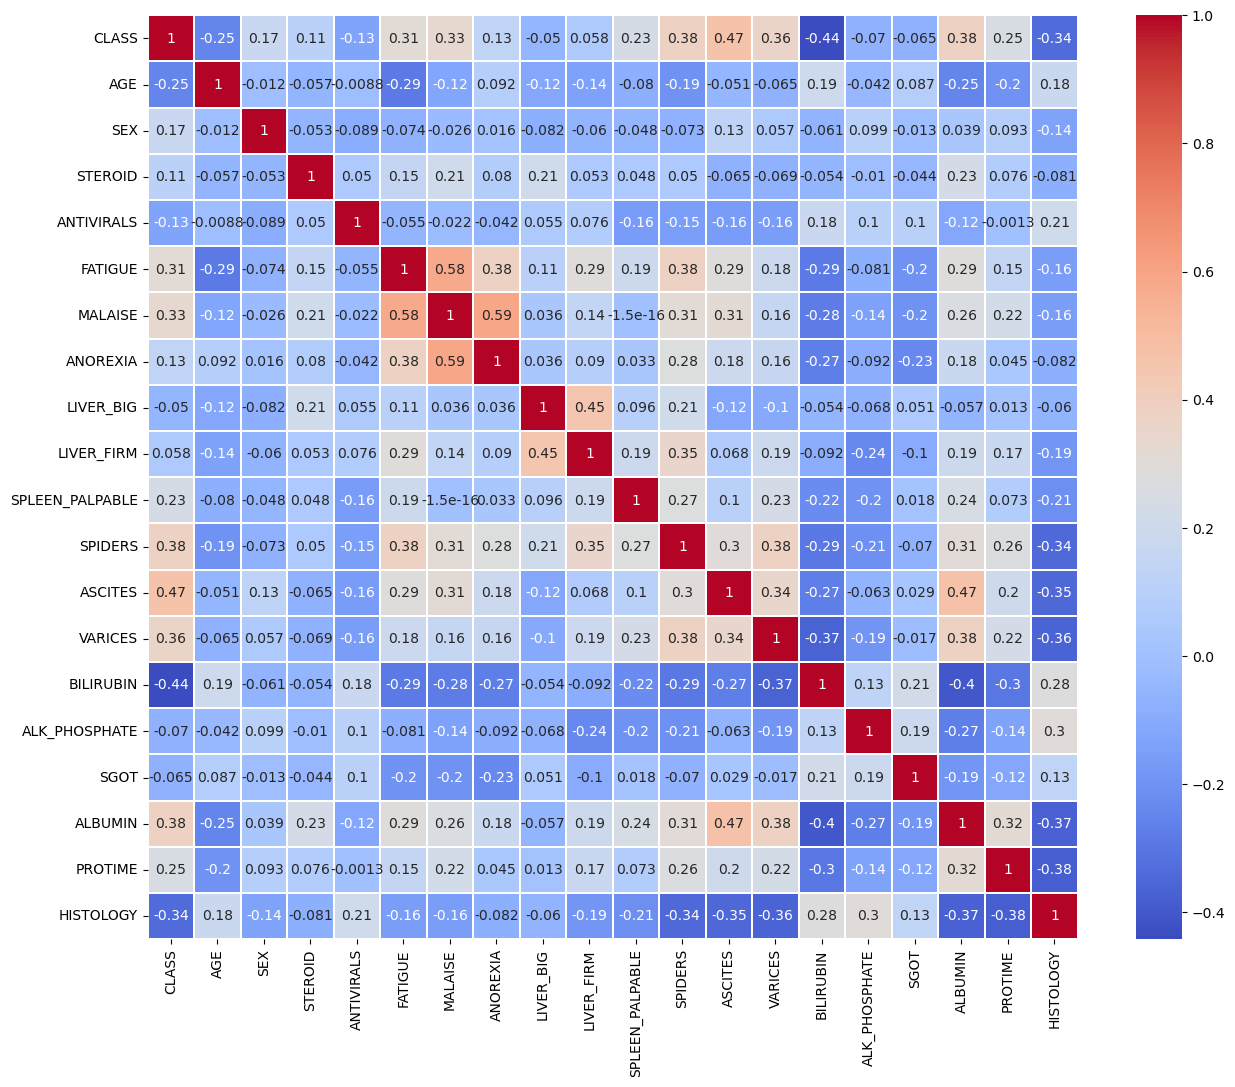

In [25]:
corr_matrix = df2.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm',linewidths=.1, annot=True)
plt.show()

# Interpretation: 

It is visible from the heatmap that some of the variables show a coefficient of ~0.6 or -0.4, but most of them display a very low correlation coefficient. So we can conclude that there is no strong linear correlation between our variables. So we can conclude that there is no strong linear correlation between the variables. The values more close to one indicate strong correlation. The values with negative sign indicates negative correlation.  Values with positive sign indicates positive correlation

- Maximum correlation is between SGOT and Bilirubin
- Relationship between SGOT and Bilirubin is higher than other variables in this dataset

- Minimum Correlation is between Alkaline Phosphate and Albumin
- Relationship between Alkaline Phosphate and Albumin is very lower than other variables in this dataset

# Trying to get the idea of patients by Class
### Class Distribution: DIE: 32 LIVE: 123

From the infromation of the data we can see data has no clear declaration about the target response. So I consider Class distribution : Live==1, Die==2

In [26]:
patients = df2.shape[0]
live_patients = (np.sum(df2['CLASS'] == 1)/patients)*100
dead_patients = (np.sum(df2['CLASS'] == 2)/patients)*100
print("Living patients:", round(live_patients,2),"%")
print("Dead patients:", round(dead_patients,2),"%")

Living patients: 20.65 %
Dead patients: 79.35 %


### Draw pie plot to see the distribution

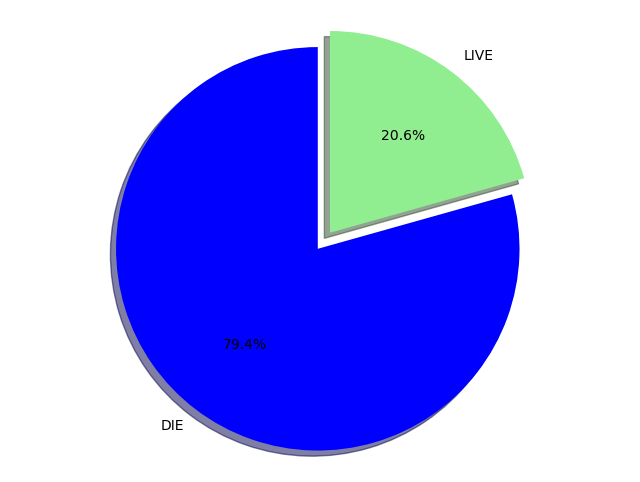

In [27]:
die =len(df2[df2['CLASS'] == 2])
live = len(df2[df2['CLASS']== 1])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'DIE','LIVE'
sizes = [die,live]
colors = ['blue', 'lightgreen']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

# Number of people dieing people  is higher than number of people living people due to hepatitis.

## Divide Variables by Numerical and Categorical

# Numerical Variables

In [28]:
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT']
df2[numerical_variables].describe()

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK_PHOSPHATE,SGOT
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.322581,1.452258,61.141935,3.803871,104.232258,84.722581
std,12.743185,1.231214,21.700571,0.674574,48.609739,88.783154
min,7.000000,0.300000,0.000000,2.100000,30.000000,14.000000
25%,32.000000,0.700000,46.000000,3.350000,76.000000,31.500000
50%,39.000000,1.000000,62.000000,4.000000,85.000000,55.000000
75%,50.000000,1.500000,75.000000,4.200000,126.500000,99.000000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.000000


The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

<p> -We can observed in the table that the patients belong to an age bracket of 7-78 years, with a mean of 41.3.
<br> -If we pay attention to the means of the different variables, it is interesting to note that they display a moderate variance; the range goes from 1.36 (bilirubin) to 104.23 (alk_phosphate).
<br> -Also, the variables sgot and alk_phosphate show a high standard deviation.
<br> -The rest of the variables appear to be normally distributed.

# Categorical Variables

In [29]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
df2[categorical_variables].describe()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.103226,1.516129,1.845161,1.354839,1.600000,1.793548,1.838710,1.587097,1.806452,1.664516,1.870968,1.883871,1.451613
std,0.305240,0.501360,0.362923,0.480015,0.491486,0.406070,0.368991,0.493952,0.396360,0.473690,0.336322,0.321418,0.499266
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In this case, there is a marked predominance of observations belonging to level 0 in the variable 'SEX' which means that the dataset include more female than male patients. The variables ANTIVIRALS, ANOREXIA, ASCITES and VARICES include much more observations in the class 0 than in the class 1. 

This could point out that these features are differentially present in the patients and could be interesting variables influencing their survival.

# Summary Statistics by Level

#### Numerical Variable

In [30]:
grouped = df2.groupby(['CLASS'])
functions = ['count','mean', 'min', 'max']
result = grouped[['AGE', 'BILIRUBIN']].agg(functions)
result1 = grouped[['PROTIME', 'ALBUMIN']].agg(functions)
result2 = grouped[['ALK_PHOSPHATE', 'SGOT']].agg(functions)

In [31]:
print(result)
print(result1)
print(result2)

        AGE                        BILIRUBIN                    
      count       mean   min   max     count      mean  min  max
CLASS                                                           
1.0      32  47.500000  30.0  70.0        32  2.515625  0.4  8.0
2.0     123  39.715447   7.0  78.0       123  1.175610  0.3  4.8
      PROTIME                         ALBUMIN                    
        count       mean   min    max   count      mean  min  max
CLASS                                                            
1.0        32  50.718750  23.0   90.0      32  3.296875  2.1  5.0
2.0       123  63.853659   0.0  100.0     123  3.935772  2.1  6.4
      ALK_PHOSPHATE                           SGOT                        
              count        mean   min    max count       mean   min    max
CLASS                                                                     
1.0              32  110.906250  34.0  280.0    32  95.968750  16.0  528.0
2.0             123  102.495935  30.0  295.0 

# Categorical Variable

In [32]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']

In [33]:
grouped = df2.groupby(['CLASS'])
functions = ['count','mean', 'min', 'max']
result3 = grouped[['SEX' , 'STEROID']].agg(functions)
result4 = grouped[['ANTIVIRALS', 'FATIGUE']].agg(functions)
result5 = grouped[['MALAISE','ANOREXIA']].agg(functions)
result6 = grouped[['LIVER_BIG','LIVER_FIRM']].agg(functions)
result7 = grouped[['SPLEEN_PALPABLE', 'FATIGUE']].agg(functions)
result8 = grouped[['SPIDERS','ASCITES']].agg(functions)
result9 = grouped[['VARICES', 'HISTOLOGY']].agg(functions)

In [34]:
print(result3)
print(result4)
print(result5)
print(result6)
print(result7)
print(result8)
print(result9)

        SEX                     STEROID                    
      count      mean  min  max   count      mean  min  max
CLASS                                                      
1.0      32  1.000000  1.0  1.0      32  1.406250  1.0  2.0
2.0     123  1.130081  1.0  2.0     123  1.544715  1.0  2.0
      ANTIVIRALS                     FATIGUE                    
           count      mean  min  max   count      mean  min  max
CLASS                                                           
1.0           32  1.937500  1.0  2.0      32  1.062500  1.0  2.0
2.0          123  1.821138  1.0  2.0     123  1.430894  1.0  2.0
      MALAISE                     ANOREXIA                    
        count      mean  min  max    count      mean  min  max
CLASS                                                         
1.0        32  1.281250  1.0  2.0       32  1.687500  1.0  2.0
2.0       123  1.682927  1.0  2.0      123  1.821138  1.0  2.0
      LIVER_BIG                     LIVER_FIRM              

# Graphical Representation

## Outlier handling for numerical variable

### Here we consider 1 is male and 2 is female

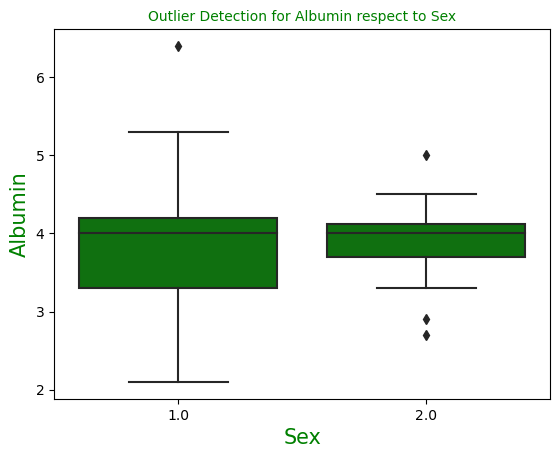

In [35]:
sns.boxplot(x = 'SEX',y = 'ALBUMIN',data = df2, color = 'green');
plt.title('Outlier Detection for Albumin respect to Sex',fontsize=10,color='green');
plt.xlabel('Sex',fontsize=15,color='green');
plt.ylabel('Albumin',fontsize=15,color='green');
plt.show();

#### From this boxplot we can see that both male and female contains outliers with respect to albumin

### Here class distribution is Die 2 and Live 1

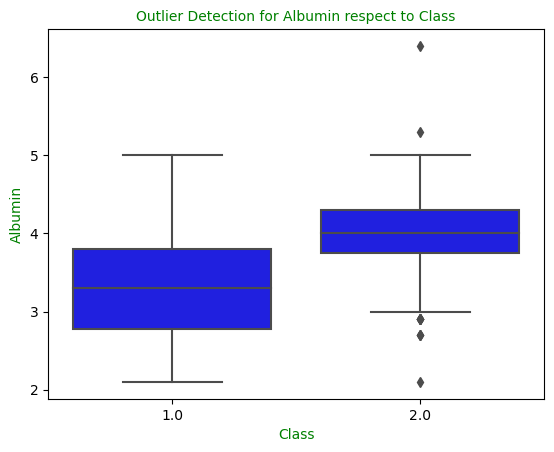

In [36]:
sns.boxplot(x = 'CLASS',y = 'ALBUMIN',data = df2, color = 'blue');
plt.title('Outlier Detection for Albumin respect to Class',fontsize=10,color='green');
plt.xlabel('Class',fontsize=10,color='green');
plt.ylabel('Albumin',fontsize=10,color='green');
plt.show();

### From this box plot we can see that die classes only contains outliers with respect to Albumin where live classes contains no outliers.

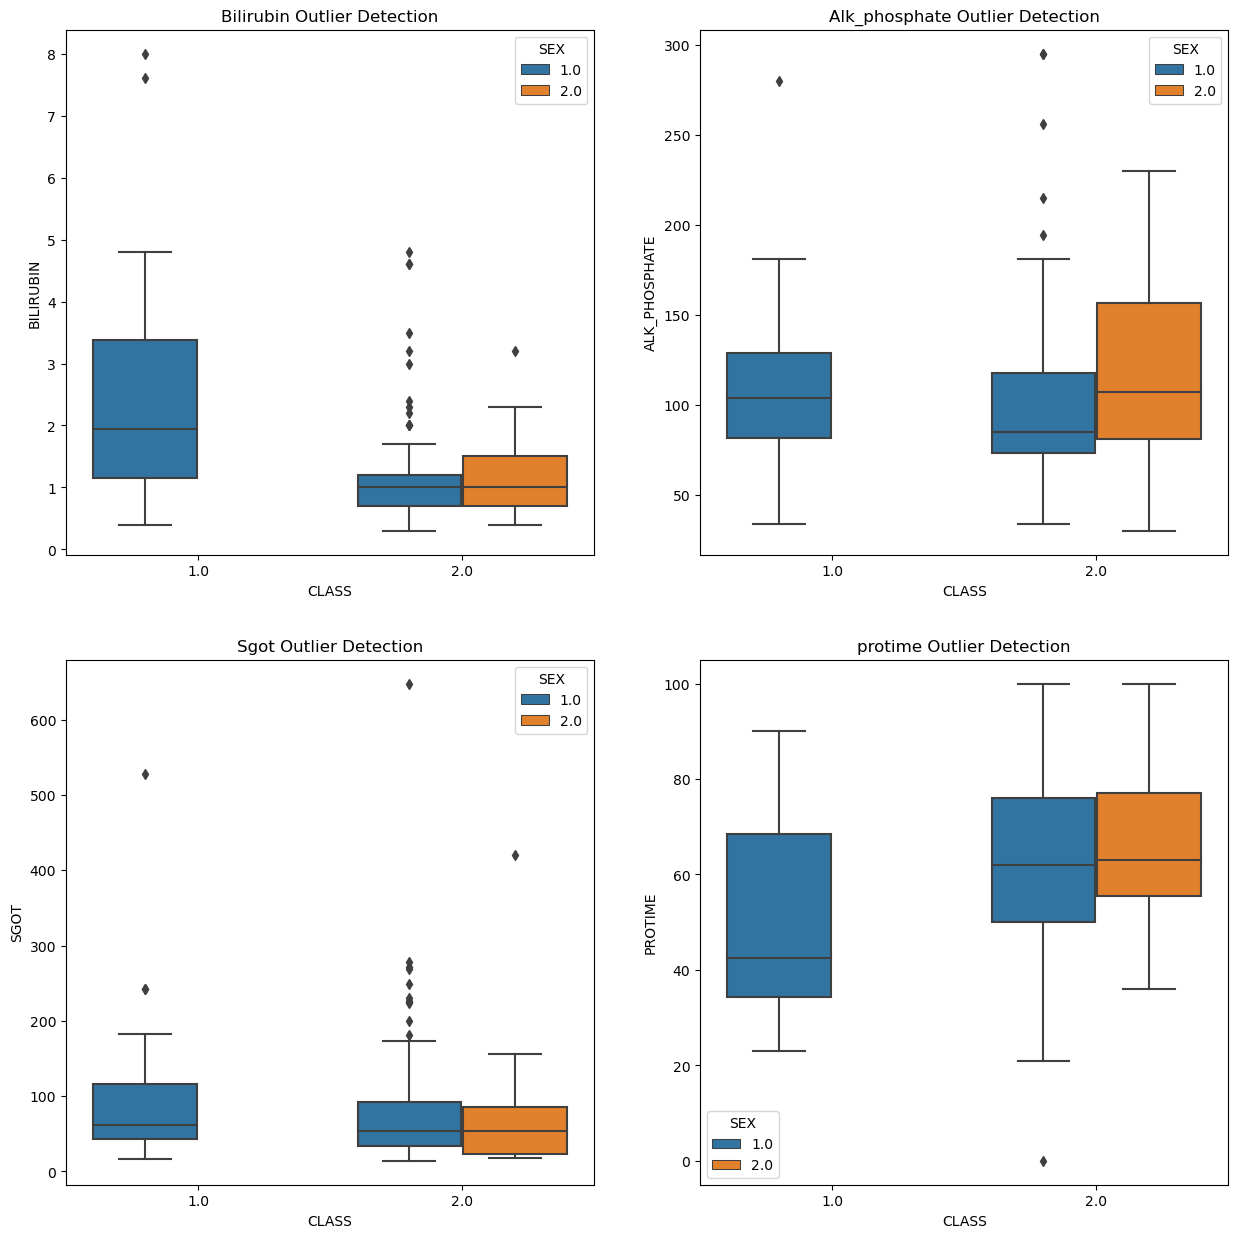

In [37]:
#df2.boxplot(column=['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'])
#plt.show()
Fig,axes = plt.subplots(2,2,figsize = (15,15));
sns.boxplot(x = 'CLASS', y = 'BILIRUBIN', data = df2, hue = 'SEX', ax = axes[0][0]).set_title("Bilirubin Outlier Detection");
sns.boxplot(x = 'CLASS', y = 'ALK_PHOSPHATE', data = df2, hue = 'SEX', ax = axes[0][1]).set_title("Alk_phosphate Outlier Detection");
sns.boxplot(x = 'CLASS',y = 'SGOT',data = df2, hue = 'SEX', ax = axes[1][0]).set_title("Sgot Outlier Detection");
sns.boxplot(x = 'CLASS',y = 'PROTIME',data = df2, hue ='SEX', ax = axes[1][1]).set_title("protime Outlier Detection");
plt.show()

#### The above plot gives the detection of outliers from this dataset with respect to Class and Gender. Bilirubin with gender of female with class of live having many outliers in this dataset.


# Outlier remove for Billirubin

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 + IQR)
    upper_range = Q3+(1.5 + IQR)
    return lower_range, upper_range

In [39]:
low_bilirubin,high_bilirubin = remove_outlier(df2['BILIRUBIN'])
df2['BILIRUBIN']=np.where(df2['BILIRUBIN']>high_bilirubin,high_bilirubin,df2['BILIRUBIN'])
df2['BILIRUBIN']=np.where(df2['BILIRUBIN']<low_bilirubin,low_bilirubin,df2['BILIRUBIN'])

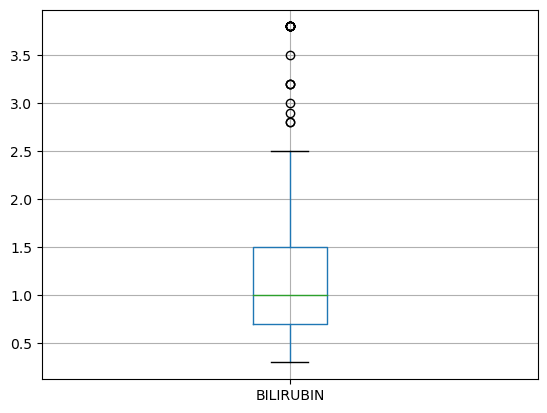

In [40]:
df2.boxplot(column=['BILIRUBIN'])
plt.show()

# Histogram  of Numerical variable

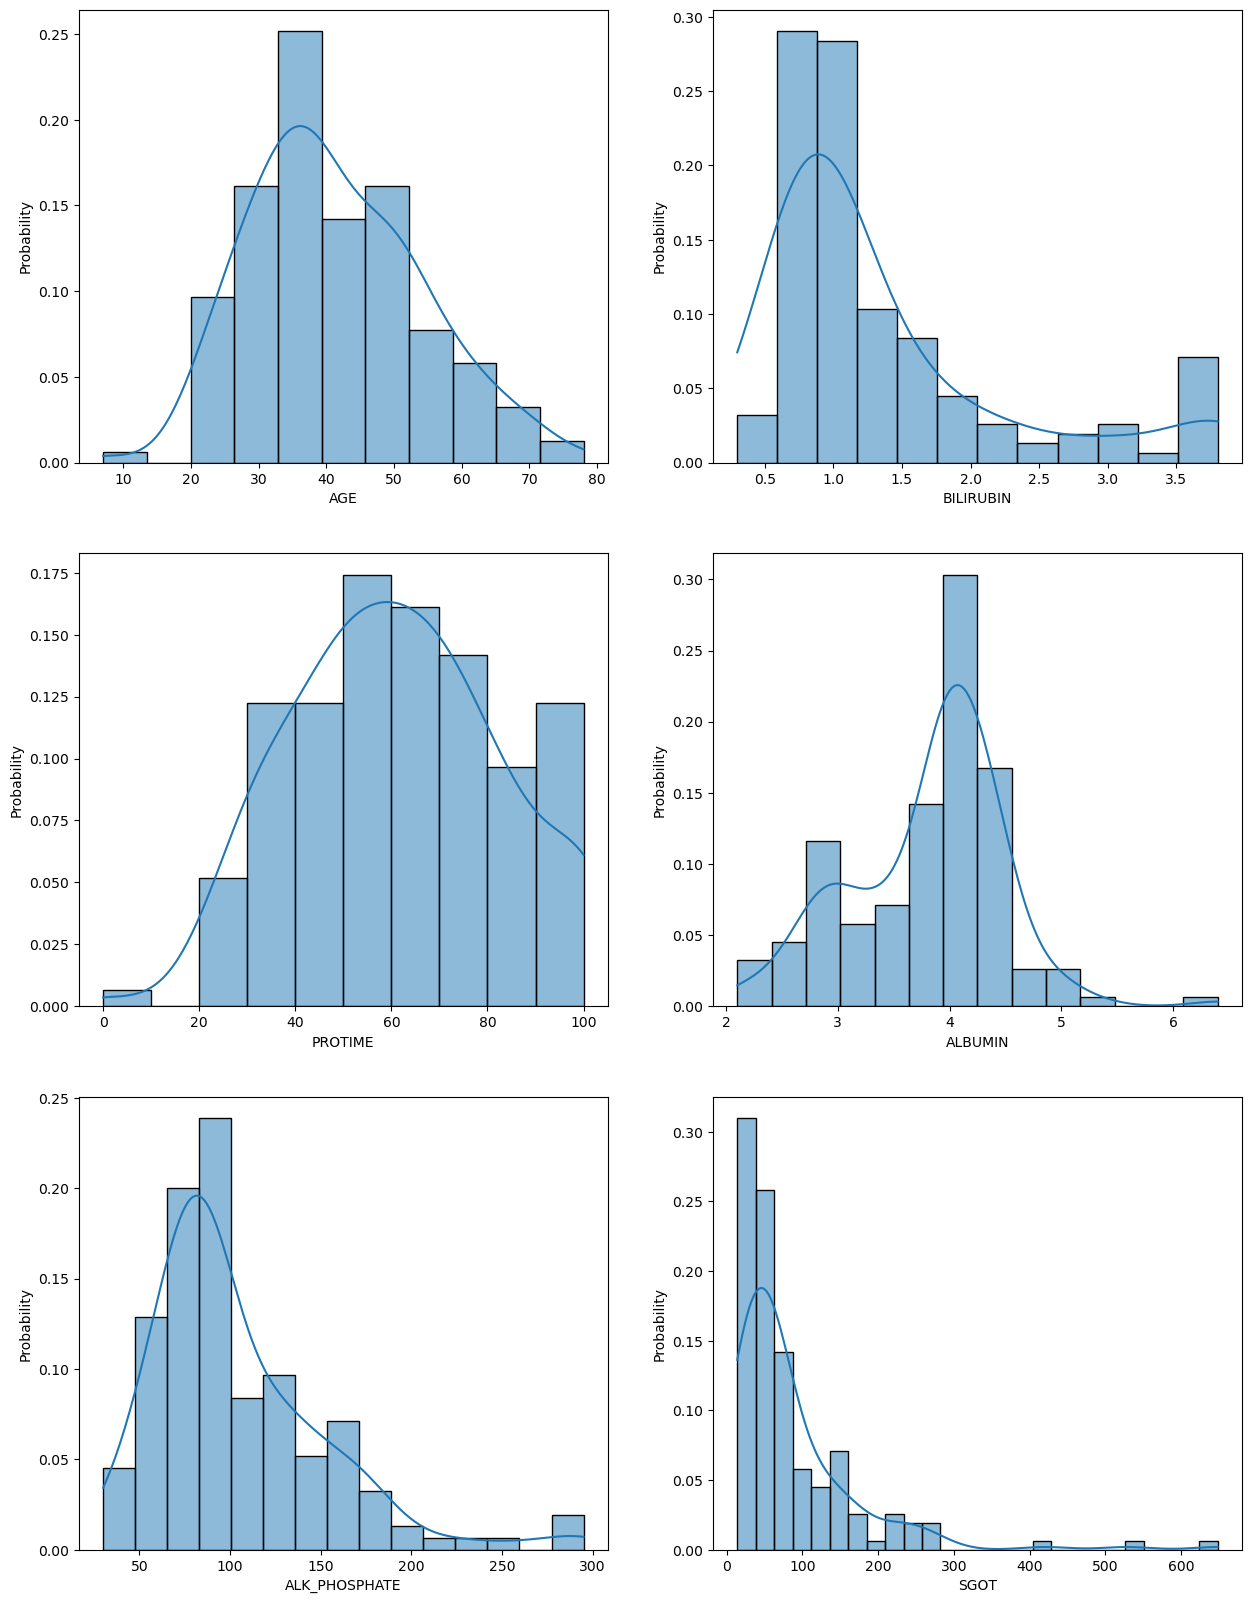

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
sns.histplot(x = df2['AGE'], stat = 'probability', kde = True, ax=axes[0,0]);
sns.histplot(x = df2['BILIRUBIN'], stat = 'probability', kde = True,ax=axes[0,1]);
sns.histplot(x = df2['PROTIME'],stat = 'probability', kde = True, ax=axes[1,0]);
sns.histplot(x = df2['ALBUMIN'],stat = 'probability', kde = True,ax=axes[1,1]);
sns.histplot(x = df2['ALK_PHOSPHATE'],stat = 'probability', kde = True, ax=axes[2,0]);
sns.histplot(x = df2['SGOT'],stat = 'probability', kde = True,ax=axes[2,1]);
fig.subplots_adjust(hspace=0.2)
plt.show()

In [42]:
print('mean for age:' , np.mean(df2['AGE']))
print('median for Age:' , np.median(df2['AGE']))
print('mean for Bilirubin:' , np.mean(df2['BILIRUBIN']))
print('median for Bilirubin:' , np.median(df2['BILIRUBIN']))
print('mean for Protime:' , np.mean(df2['PROTIME']))
print('median Protime:' , np.median(df2['PROTIME']))
print('mean for Albumin:' , np.mean(df2['ALBUMIN']))
print('median Albumin:' , np.median(df2['ALBUMIN']))
print('mean Alk_phosphate:' , np.mean(df2['ALK_PHOSPHATE']))
print('median Alk_phosphate:' , np.median(df2['ALK_PHOSPHATE']))
print('mean for Sgot:' , np.mean(df2['SGOT']))
print('median for Sgot:' , np.median(df2['SGOT']))

mean for age: 41.32258064516129
median for Age: 39.0
mean for Bilirubin: 1.3619354838709676
median for Bilirubin: 1.0
mean for Protime: 61.14193548387097
median Protime: 62.0
mean for Albumin: 3.803870967741936
median Albumin: 4.0
mean Alk_phosphate: 104.23225806451613
median Alk_phosphate: 85.0
mean for Sgot: 84.72258064516129
median for Sgot: 55.0


# Physical Interpretation

- From the above graps we can say for the Age, Bilirubin, Alk_phosphate, Sgot distribution it is Slightly Right Skewed,since mean is greater than median
- For Protime, Albumin slightly left skewed since median is greater than mean

#### This shows that most of the people in the dataset have age between 25-50(approx.) with maximum people having age = 36-38 and 50-55. Only a few people with age<=30 and age>=62 suffer from Hepatitis

# Creating a KDE Plot using seaborn library for continuous variable

KDE plot - Kernel Density Estimation Plot - visualizes the distribution of obserations in a dataset

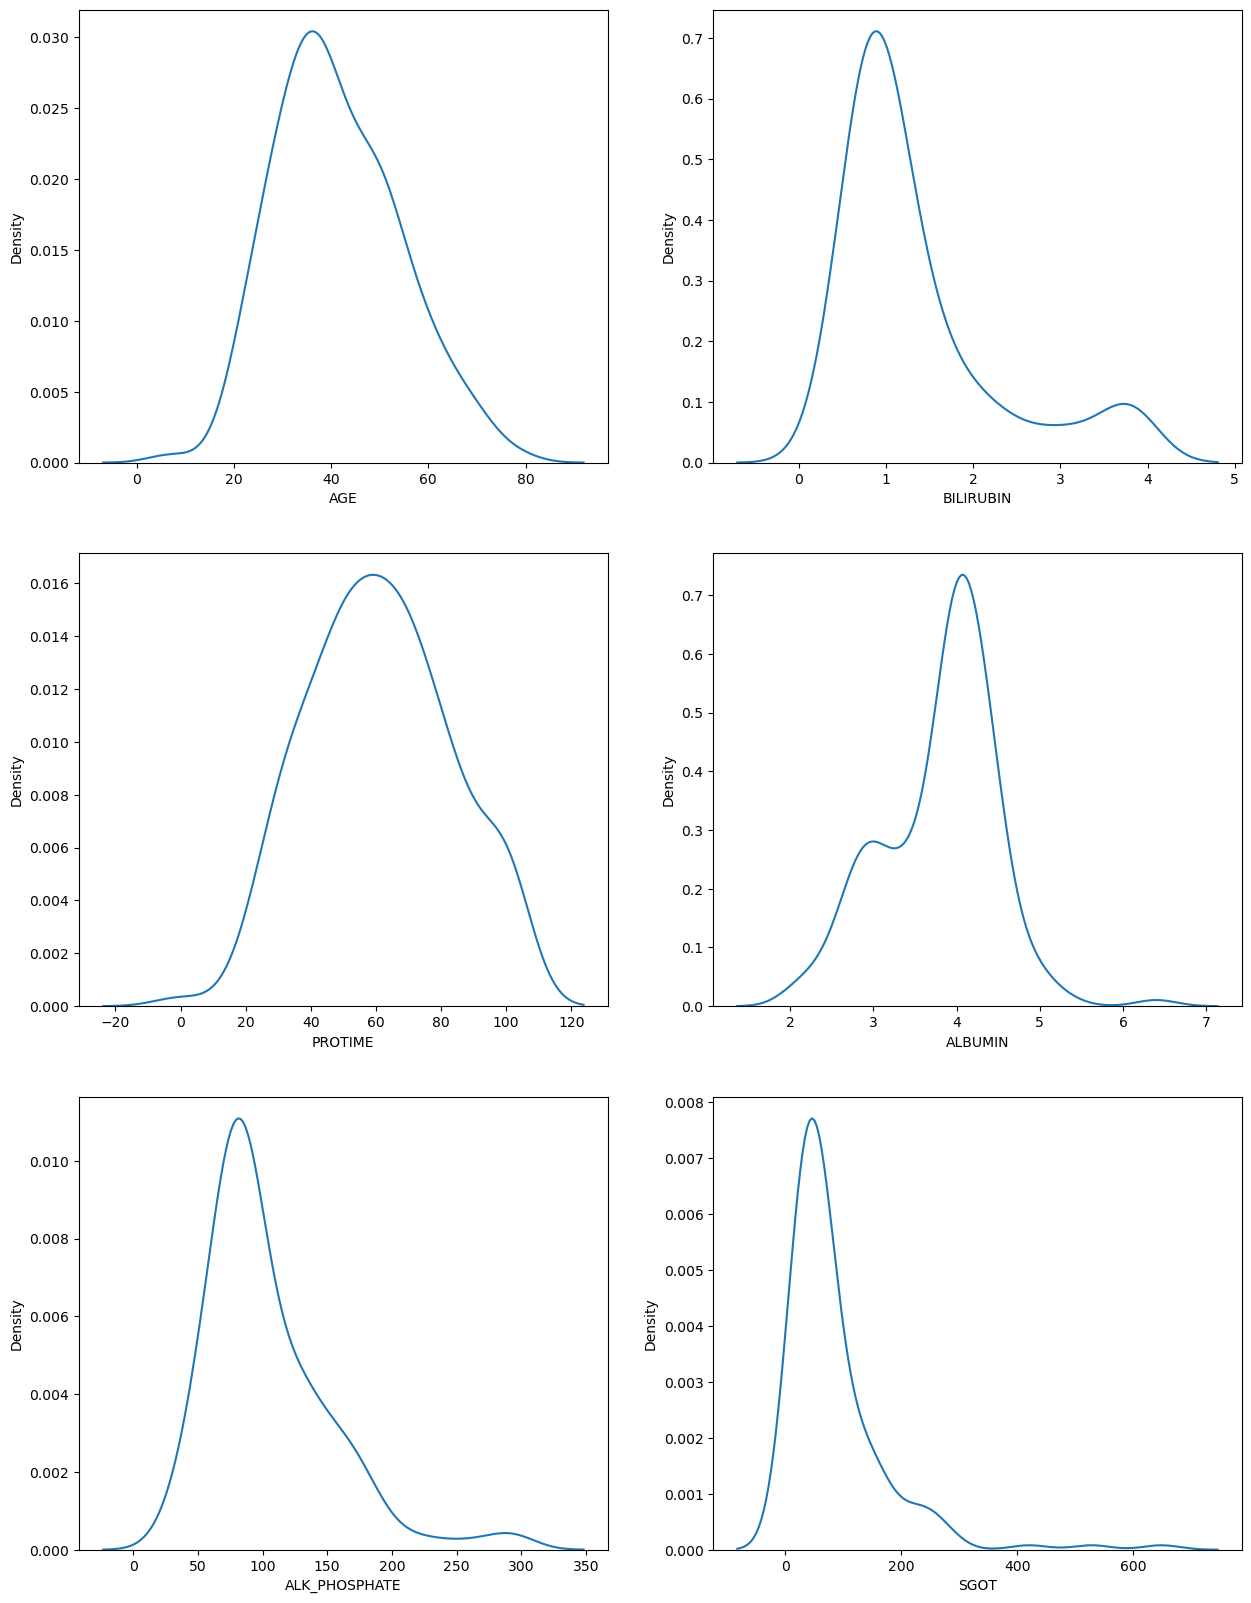

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
sns.kdeplot(df2.AGE, ax=axes[0,0]);
sns.kdeplot(df2.BILIRUBIN, ax=axes[0,1]);
sns.kdeplot(df2.PROTIME, ax=axes[1,0]);
sns.kdeplot(df2.ALBUMIN, ax=axes[1,1]);
sns.kdeplot(df2.ALK_PHOSPHATE,ax=axes[2,0] );
sns.kdeplot(df2.SGOT, ax=axes[2,1]);
fig.subplots_adjust(hspace=0.2)
plt.show();

# Physical Interpretation

- All these plots indicate that people with lower bilirubin (values between 0-2) are more prone to Hepatitis
- This implies that Maximum people have alkaline phosphate value of 80-100

# Divide Age in different limit

In [44]:
df2_youth = df2[(df2['AGE'] > 1) & (df2['AGE'] <=30) ]
df2_medium_aged = df2[(df2['AGE'] > 30 ) & (df2['AGE'] <= 55) ]
df2_over_aged = df2[df2['AGE'] > 55]

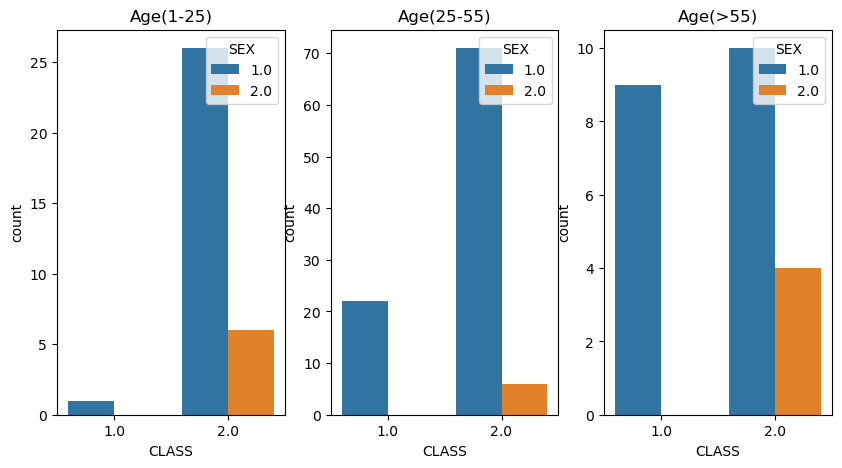

In [45]:
Fig,ax = plt.subplots(1,3,figsize=(10,5));

sns.countplot(df2_youth['CLASS'], hue = df2_youth['SEX'], ax = ax[0]).set_title("Age(1-25)");

sns.countplot(df2_medium_aged['CLASS'],hue = df2_medium_aged['SEX'], ax = ax[1]).set_title("Age(25-55)");

sns.countplot(df2_over_aged['CLASS'],hue = df2_over_aged['SEX'], ax = ax[2]).set_title("Age(>55)");
plt.show();

### Here we consider 1 is male and 2 is female
### Die 2, Live 1
### Death rate of male is higher than female

# Conclusion

From this analysis we can conclude that Males are more affected than Females by Hepatitis

Mostly aged Males are died due to hepatitis.